In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test= pd.read_csv("tested.csv")
train = pd.read_csv("train.csv")
test_id=test['PassengerId']

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


# Data Dictionary

Survived: 0 = No, 1 = Yes

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp: # of siblings / spouses aboard the Titanic

parch: # of parents / children aboard the Titanic

ticket: Ticket number

cabin: Cabin number

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test= test.drop(labels=["Cabin", "PassengerId", "Name", "Ticket"], axis = 1)
train = train.drop(labels=["Cabin", "PassengerId", "Name", "Ticket"], axis = 1)

In [13]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
print(test.isnull().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [16]:
print(train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [17]:
print(test[["Age", "Fare"]].median())

Age     27.0000
Fare    14.4542
dtype: float64


In [18]:
print(train[["Age", "Fare"]].median())

Age     28.0000
Fare    14.4542
dtype: float64


In [19]:
test["Age"].fillna("27", inplace = True)
test["Fare"].fillna("14.45", inplace = True)
train["Age"].fillna("28", inplace = True)
train["Fare"].fillna("14.45", inplace = True)

In [20]:
print(test.isnull().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [21]:
train["Embarked"].mode() 

0    S
Name: Embarked, dtype: object

In [22]:
train['Embarked'].fillna("S", inplace=True)

In [23]:
print(train.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Sex       418 non-null    object
 2   Age       418 non-null    object
 3   SibSp     418 non-null    int64 
 4   Parch     418 non-null    int64 
 5   Fare      418 non-null    object
 6   Embarked  418 non-null    object
dtypes: int64(3), object(4)
memory usage: 23.0+ KB


In [25]:
def barchart(feature):
    survived_people = train[train["Survived"] == 1][feature].value_counts()
    dead_people = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived_people,dead_people])
    df.index = ["Survived People", "Dead People"]
    df.plot(kind='bar',stacked = True, figsize = (10,5))

Survived People:
 female    233
male      109
Name: Sex, dtype: int64
Dead People:
 male      468
female     81
Name: Sex, dtype: int64


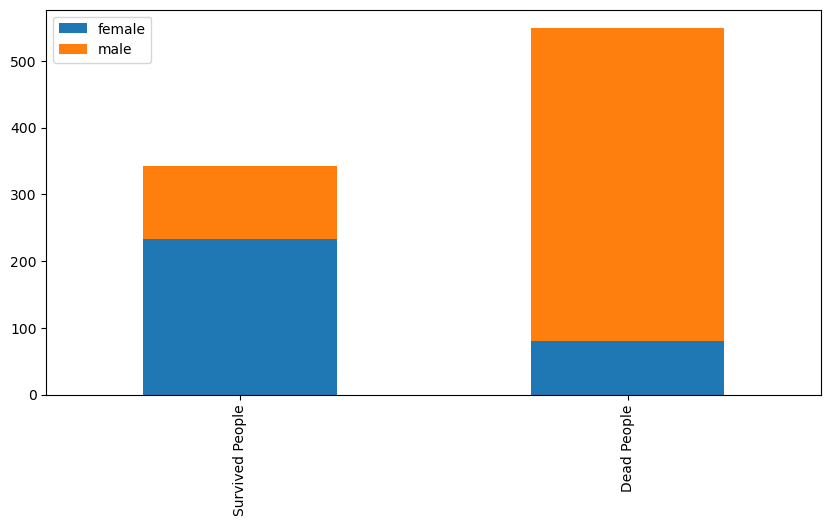

In [26]:
barchart('Sex')
print("Survived People:\n",train[train["Survived"]== 1]['Sex'].value_counts())
print("Dead People:\n", train[train["Survived"]== 0]['Sex'].value_counts())

This bar chart shows that feamale are more likely to survived than male.

Survived People:
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead People:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


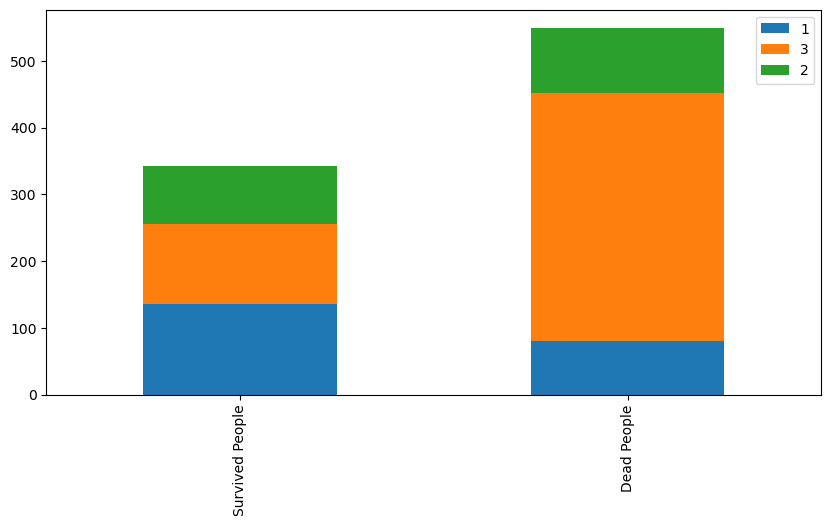

In [27]:
barchart('Pclass')
print("Survived People:\n", train[train["Survived"]==1]['Pclass'].value_counts())
print("Dead People:\n", train[train["Survived"]==0]['Pclass'].value_counts())

This bar chart shows that people from 3rd class are more likely to be dead than 1st class.
People from 1st class are more likely to be survived.

Survived People:
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead People:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


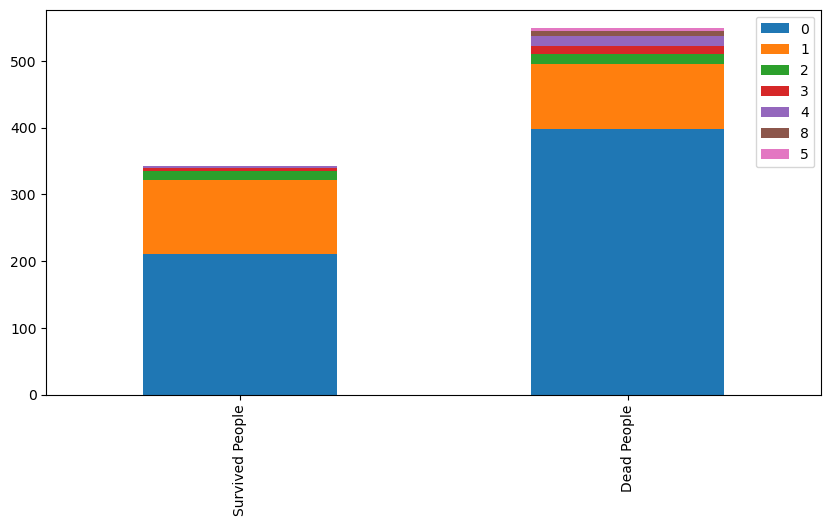

In [28]:
barchart('SibSp')
print("Survived People:\n", train[train["Survived"]==1]['SibSp'].value_counts())
print("Dead People:\n", train[train["Survived"]==0]['SibSp'].value_counts())

People who aboarded without any siblings or spouse are more likely to dead.

Survived People:
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead People:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


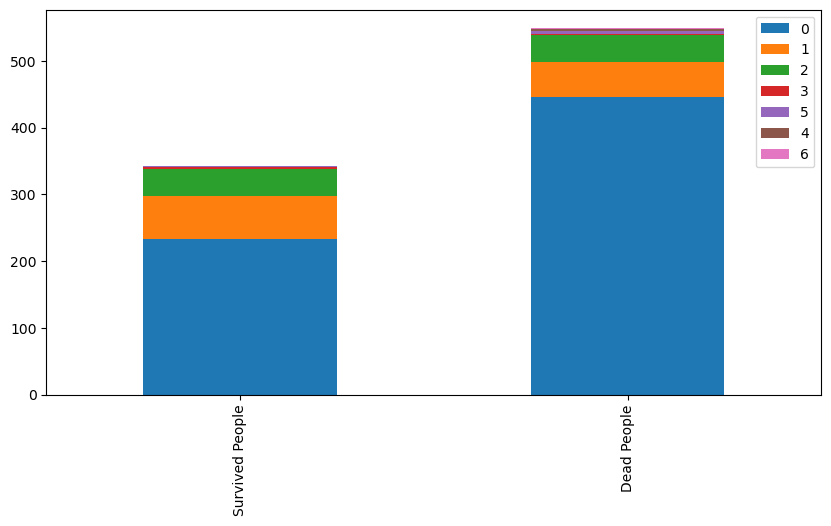

In [29]:
barchart('Parch')
print("Survived People:\n", train[train["Survived"]==1]['Parch'].value_counts())
print("Dead People:\n", train[train["Survived"]==0]['Parch'].value_counts())

People without a children a likely to be dead.

People with 2 or more persons are likely to be survived.

Survived People:
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Dead People:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


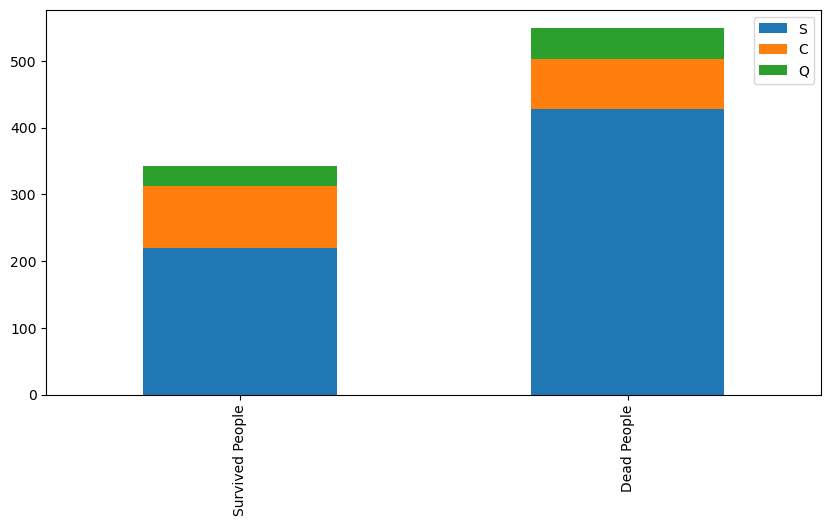

In [30]:
barchart('Embarked')
print("Survived People:\n", train[train["Survived"]==1]['Embarked'].value_counts())
print("Dead People:\n", train[train["Survived"]==0]['Embarked'].value_counts())

People aboarded from C are more likely to be survived.

People aboarded from S and Q are more likely to be dead.

In [31]:
train['Sex']=train['Sex'].apply({'male':0,'female':1}.get) 
train['Embarked']=train['Embarked'].apply({'S':0,'Q':1, 'C':2}.get) 
test['Sex']=test['Sex'].apply({'male':0,'female':1}.get) 
test['Embarked']=test['Embarked'].apply({'S':0,'Q':1, 'C':2}.get)

In [32]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [35]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
forest_pred=forest.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,forest_pred)
ac=accuracy_score(y_test,forest_pred)

In [38]:
print(cm)

[[89 16]
 [27 47]]


In [39]:
print("The Accuracy of Model is :",ac)

The Accuracy of Model is : 0.7597765363128491


In [40]:
#Taking Final Input of Test Data for accuracy check
final_pred = forest.predict(test)

In [41]:
df=pd.DataFrame({'PassengerId':test_id.values,"Survived":final_pred})

In [42]:
df.to_csv('final_pred',index=False)

In [43]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
